#### Shortest Path in Directed Acyclic Graph

Given a Weighted Directed Acyclic Graph and a source vertex in the graph, find the shortest paths from given source to all other vertices.

For a general weighted graph, we can calculate single source shortest distances in O(VE) time using Bellman–Ford Algorithm. For a graph with no negative weights, we can do better and calculate single source shortest distances in O(E + VLogV) time using Dijkstra’s algorithm. Can we do even better for Directed Acyclic Graph (DAG)? We can calculate single source shortest distances in O(V+E) time for DAGs. The idea is to use Topological Sorting.

We initialize distances to all vertices as infinite and distance to source as 0, then we find a topological sorting of the graph. Topological Sorting of a graph represents a linear ordering of the graph (See below, figure (b) is a linear representation of figure (a) ). Once we have topological order (or linear representation), we one by one process all vertices in topological order. For every vertex being processed, we update distances of its adjacent using distance of current vertex.

Following figure is taken from this source. It shows step by step process of finding shortest paths.

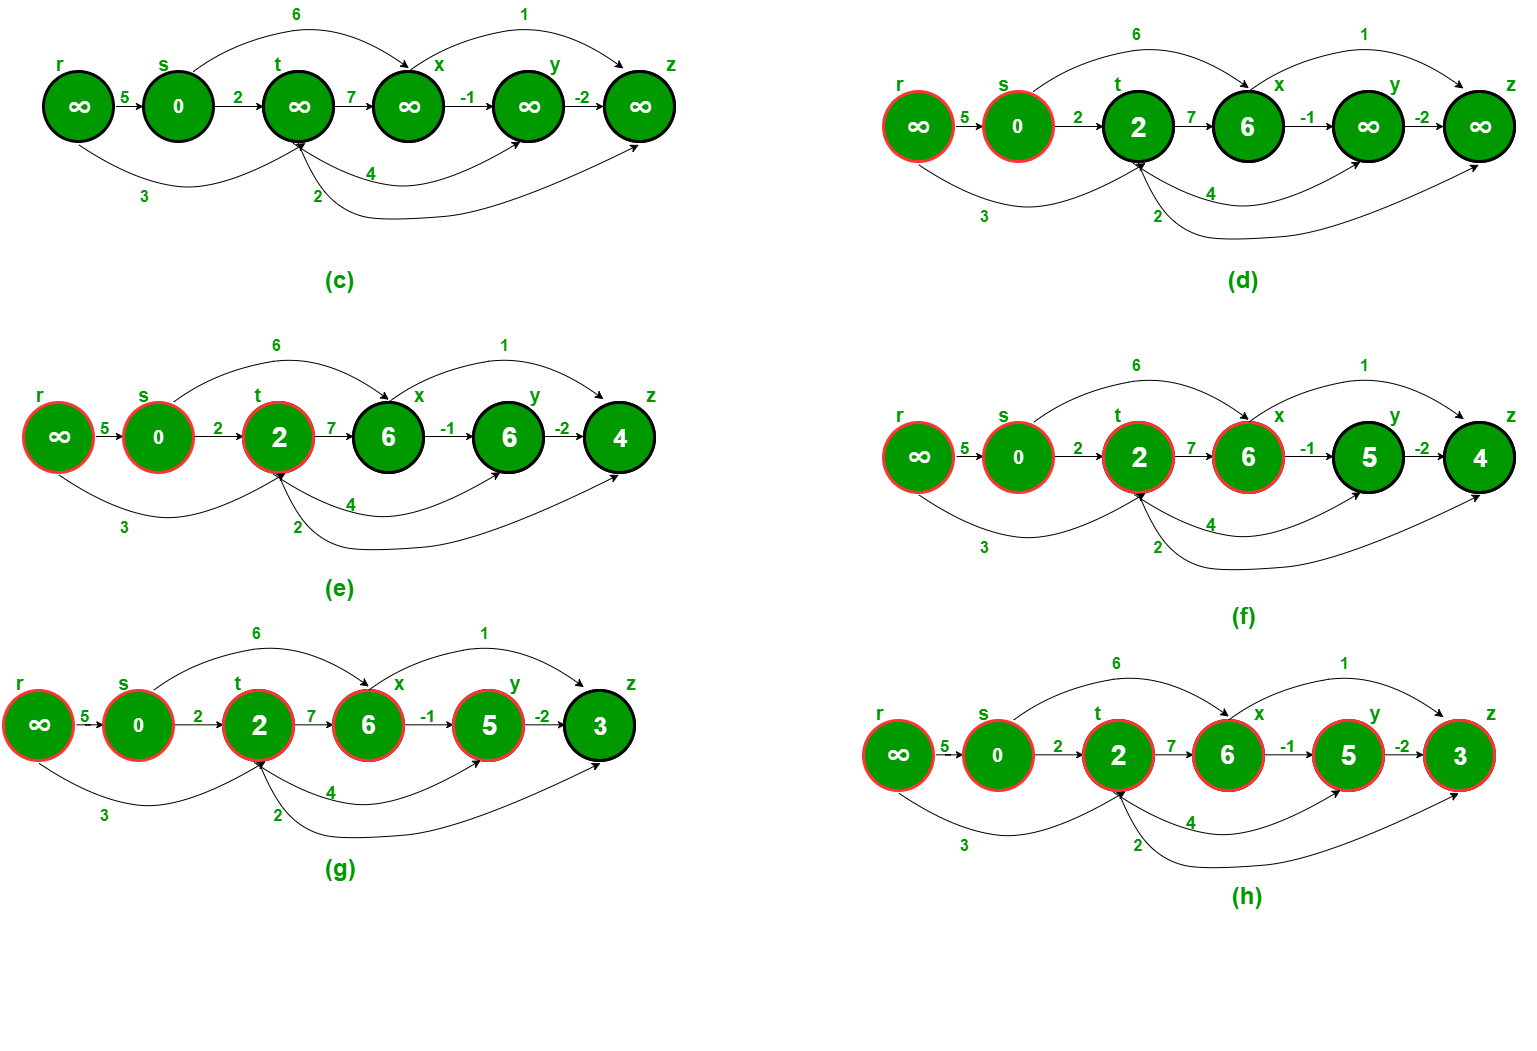

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/shortestpathstart2.png")

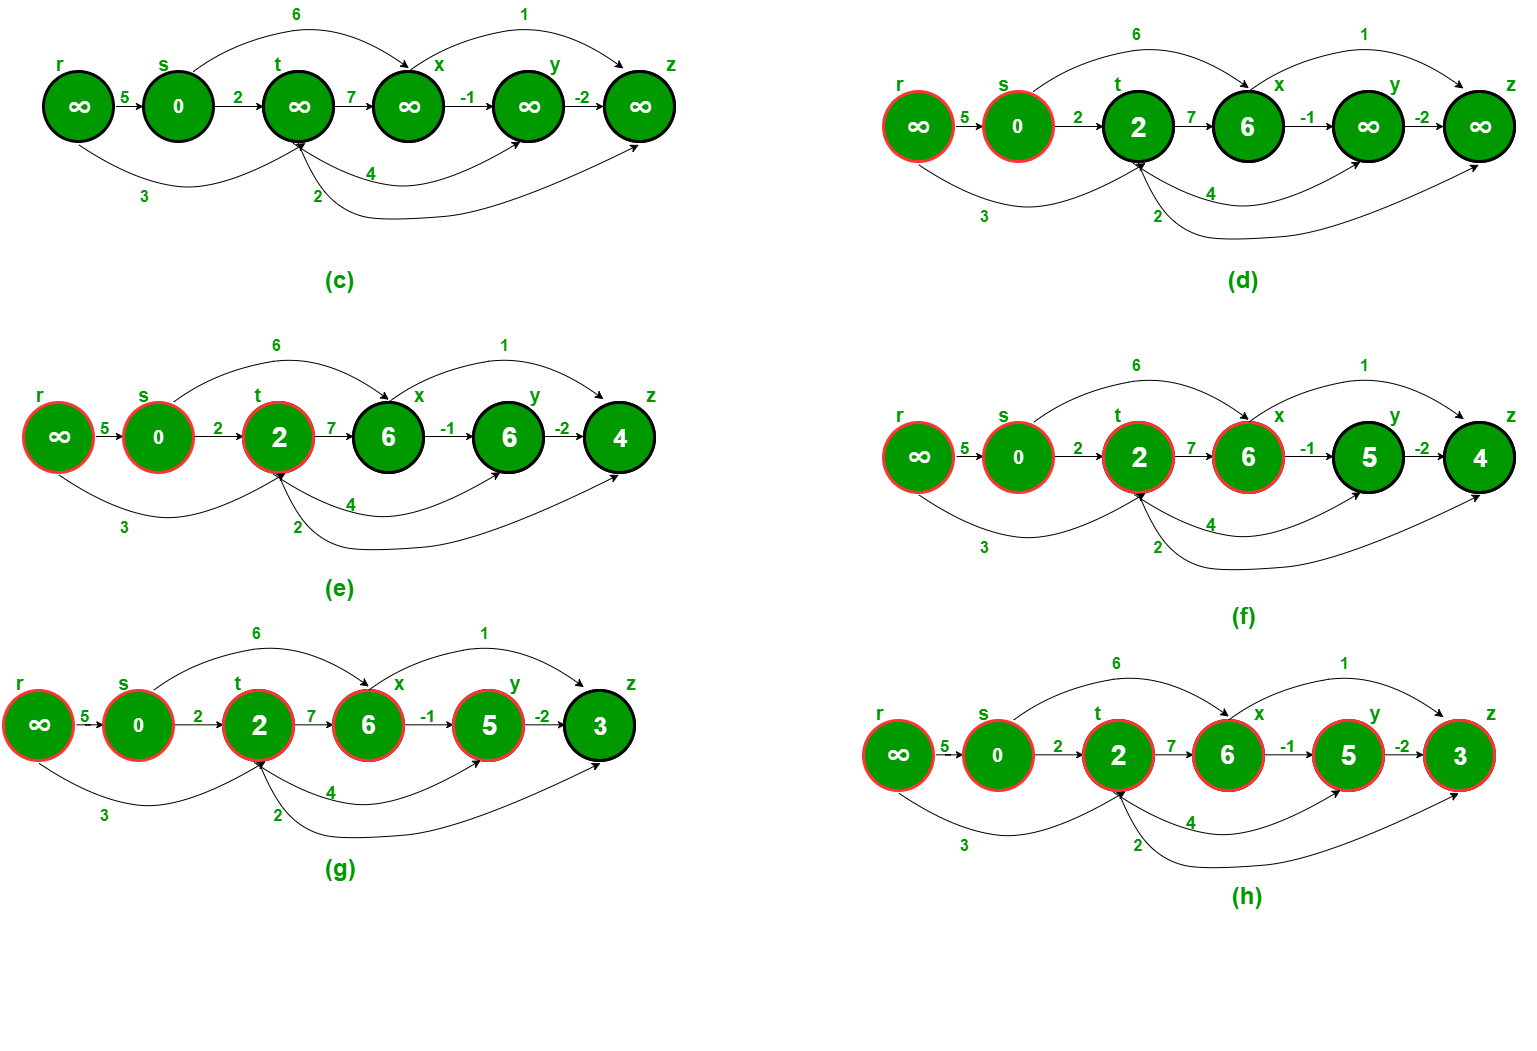

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/shortestpathstart2.png")

Following is complete algorithm for finding shortest distances. 

1. Initialize dist[] = {INF, INF, ….} and dist[s] = 0 where s is the source vertex. 
2. Create a topological order of all vertices. 
3. Do following for every vertex u in topological order. 

    ………..Do following for every adjacent vertex v of u 

    ………………if (dist[v] > dist[u] + weight(u, v)) 
    
    ………………………dist[v] = dist[u] + weight(u, v) 

In [ ]:
from collections import defaultdict

class Graph:
	def __init__(self,vertices):
		self.V = vertices
		self.graph = defaultdict(list)

	def addEdge(self,u,v,w):
		self.graph[u].append((v,w))

	def topologicalSortUtil(self,v,visited,stack):
		visited[v] = True
		if v in self.graph.keys():
			for node,weight in self.graph[v]:
				if visited[node] == False:
					self.topologicalSortUtil(node,visited,stack)
     
		stack.append(v)

	def shortestPath(self, s):
		visited = [False]*self.V
		stack =[]
		for i in range(self.V):
			if visited[i] == False:
				self.topologicalSortUtil(s,visited,stack)

		dist = [float("Inf")] * (self.V)
		dist[s] = 0
		while stack:
			i = stack.pop()
			for node,weight in self.graph[i]:
				if dist[node] > dist[i] + weight:
					dist[node] = dist[i] + weight

		for i in range(self.V):
			print (("%d" %dist[i]) if dist[i] != float("Inf") else "Inf" ,end=" ")


g = Graph(6)
g.addEdge(0, 1, 5)
g.addEdge(0, 2, 3)
g.addEdge(1, 3, 6)
g.addEdge(1, 2, 2)
g.addEdge(2, 4, 4)
g.addEdge(2, 5, 2)
g.addEdge(2, 3, 7)
g.addEdge(3, 4, -1)
g.addEdge(4, 5, -2)
s = 1
print ("Following are shortest distances from source %d " % s)
g.shortestPath(s)

#### Time Complexity: 

Time complexity of topological sorting is O(V+E). After finding topological order, the algorithm process all vertices and for every vertex, it runs a loop for all adjacent vertices. Total adjacent vertices in a graph is O(E). So the inner loop runs O(V+E) times. Therefore, overall time complexity of this algorithm is O(V+E).

#### Auxiliary Space : O(V+E)